## Assignment 3: Spam Detection with Random Forests

1.  Write a python function that returns
    1. the frequency of a given character in a string,
    2. the frequency of a given word (maximal consecutive sequence of letters, case insensitive) in string,
    3. a list of all maximal sequences of consecutive capital letters in a string,

    in a string.

#### A

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,cross_validate,cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
def char_count(string,c):
    string=str(string)
    count=0
    for i in string:
        if i==c:
            count+=1
    return count

#### B

In [3]:
import re

def word_count(string,w):
    w=w.lower()
    words=re.findall(r"[\w']+", str(string).lower())
    wcount=0
    for i in words:
        if i==w:
            wcount+=1
    return wcount

#### C

In [4]:
import re

def get_max_uppercase_run_from_string(s):
    list_of_uppercase_runs = re.findall(r"[A-Z]+", str(s))
    return list_of_uppercase_runs

In [5]:
from collections import Counter
def max_len(lst):
    m_len=[]
    count = Counter(len(x) for x in lst)
    for key in count:
        m_len.append(key)
    return m_len

### 2.  For each message in the dataset `sms_spam.csv`, compute:
    1. the frequency of the each of the words in the list `words` defined below,
    2. the frequency of the each of the characters in the list `chars` defined below,
    3. the average run length of a maximal sequence of capital letters,
    4. the longest run length of a maximal sequence of capital letters,
    5. the sum of the run lengths of the maximal sequences of capital letters.
    
**More precisely:**
    
- One can interpret *word* in a numbe of ways.
If we interpret *word* it as a string of consecutive letters, the sentence,
"The reporter filed a report about reportables." contains three occurences of the word *report*.
We could also interpred *word* as a string of consecutive letters, neither preceded nor followed by a letter,
then that sentence would contain only one occurence of the work *report*.
Choose whichever one of these interpretations your prefer. If you think of a better interpretation, feel free to use that.
    
- The simplest interpretation of maximal sequence of capital letters is a sequence of capital letters
neither preceded nor followed by a capital letter.
For example, in the string "abcDEFGhiJKL345 MNO PQR", "DEFG", "JKL", "MNO" and "PQR"
are maximal sequences of capital letters while "DEF" "KL" and "MNO PQR" aren't.
(The first two aren't maximal and the third doesn't consist entirely of capital letters.)
This isn't the only interpretation. In the string "He shouted, 'STOP SHOUTING AT ME!'", one could argue that "STOP SHOUTING AT ME" should count as a single (maximal) sequence of capital letters. If you prefer such an interpretation, feel free to use it.
    
- These details aren't really the point. We're just trying to extract features for analysis. Any reasonable approach is fine.
    
3.  Arrange the results in a dataframe. The frequencies computed in 1. and 2. should go in columns named
    `freq_<word>` and `freq_<char>`, respectively. The run lengths in 3., 4., and 5. should go in columns named
    `capital_run_length_average`, `capital_run_length_longest`, and `capital_run_length_total`, respectively.
    The last column in your dataframe should be the target, 1 if the target is spam and 0 if it isn't.
    Save your dataset as a `.csv` file called `sms_spam_features.csv`.


In [6]:
words = ['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet', 'order', 'mail', 'receive', 'will', 'people',
         'report', 'addresses', 'free', 'business', 'email', 'you', 'credit', 'your', 'font', '000', 'money', 'hp', 'hpl', 
         'george', '650', 'lab', 'labs', 'telnet', '857', 'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
         'cs', 'meeting', 'original', 'project', 're', 'edu', 'table', 'conference']
chars = [';', '(', '[', '!', '$', '#']

#### NOTE:
- ##### I was getting error for original file sms_spam.csv. I didnot modified any data item but corrected one delimiter in one of the row. I am submitting my copy of csv with assignment for correctly processing this code.
- ##### When reading csv, I notice messages are reading in three columns, so I am concatting three columns into one column named 'msg' and doing operations on 'msg' column.

# sms_spam.csv

In [7]:
data2=pd.read_csv("sms_spam.csv")
print(f"Raw dataframe\n{data2.head()}\n\n\n") #printing raw dataframe
data2["msg"]=data2["v2"].fillna(' ')+data2["Unnamed: 2"].fillna(' ')+data2["Unnamed: 3"].fillna(' ')+data2["Unnamed: 4"].fillna(' ')
print(f"After concatting three columns to msg column\n\n{data2.head()}") #printing dataframe after concatting three messages into one column 'msg'

Raw dataframe
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  



After concatting three columns to msg column

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already the

### Q2: A & Q3, counting word frequency and creating column for each word.

In [8]:
for i in words:
    data2[f"word_freq_{i}"]=data2['msg'].apply(word_count,w=i)

### Q2: B & Q3, counting character frequency and creating column for each character.

In [9]:
for c in chars:
    data2[f"char_freq_{c}"]=data2['msg'].apply(char_count,c=c)

### Q2: C,D and E & Q3, creating column and adding numbers in column

In [10]:
data2["maximum_string_list"]=data2['msg'].apply(get_max_uppercase_run_from_string)

data2["capital_run_length_average"]=(data2['maximum_string_list'].apply(max_len)).apply(lambda x: np.mean(x) if x!=[] else 0)
data2["capital_run_length_longest"]=(data2['maximum_string_list'].apply(max_len)).apply(lambda x: np.max(x) if x!=[] else 0)
data2["capital_run_length_total"]=(data2['maximum_string_list'].apply(max_len)).apply(lambda x: np.sum(x) if x!=[] else 0)



#### Creating target column based on spam or not classification.

In [11]:
data2["target"]=(data2['v1'].apply(lambda x: 1 if x=='spam' else 0))

In [12]:
data2.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,msg,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,maximum_string_list,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,"Go until jurong point, crazy.. Available only ...",0,0,0,0,...,0,0,0,0,0,"[G, A, C]",1.0,1,1,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,Ok lar... Joking wif u oni...,0,0,0,0,...,0,0,0,0,0,"[O, J]",1.0,1,1,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,Free entry in 2 a wkly comp to win FA Cup fina...,0,0,0,0,...,1,0,0,0,0,"[F, FA, C, M, T, FA, T, C]",1.5,2,3,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,U dun say so early hor... U c already then say...,0,0,0,0,...,0,0,0,0,0,"[U, U]",1.0,1,1,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,"Nah I don't think he goes to usf, he lives aro...",0,0,0,0,...,0,0,0,0,0,"[N, I]",1.0,1,1,0


#### Writing dataframe to csv file.

In [13]:
data2.to_csv(r'sms_spam_features.csv',index=False,header=True)

#### 4.  Based on these 57 features, use a random forest tree to train a spam-detecting classifier:

In [14]:
#data2.dtypes

In [15]:
data3=data2.drop(['v1' , 'v2','Unnamed: 2','Unnamed: 3','Unnamed: 4','msg','maximum_string_list'], axis='columns')

X=data3.drop(['target'],axis='columns')
y=data3.target

print(X.shape,y.shape)

(5572, 57) (5572,)


In [16]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)

print(X_tr.shape, y_tr.shape, X_te.shape, y_te.shape)

(4457, 57) (4457,) (1115, 57) (1115,)


#### Below I am fitting and finding accuracy for Random Forest Classifier and Decision Tree Classifier. Also finding differnce of accuracy between two classifiers. Running code 10 times for test-train split and calculating mean of differences between two methods

In [17]:
import warnings
warnings.filterwarnings("ignore")

diff=[]
for i in range(10):
    print(f"\nRun # {i+1}")
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)
    
# Random forest classifier
    RF_M=RandomForestClassifier()
    RF_M.fit(X_tr,y_tr)
    y_pr=RF_M.predict(X_te)
    acc=accuracy_score(y_pr,y_te)
    print(f"Accuracy of detecting spam sms_spam.csv and Random forest classifier ={acc}")
# Decision tree classifier
    DT_M=DecisionTreeClassifier()
    DT_M.fit(X_tr,y_tr)
    y_pr=DT_M.predict(X_te)
    acc_DT=accuracy_score(y_pr,y_te)
    print(f"Accuracy of detecting spam sms_spam.csv and Decision Tree classifier ={acc_DT}")
    print(f"Difference of accuracy between Random Forect Classifier and Decision Tree Classifier= {acc-acc_DT:.4}\n")
    diff.append(acc-acc_DT)
print(f"Mean of differnece {np.mean(diff)}")


Run # 1
Accuracy of detecting spam sms_spam.csv and Random forest classifier =0.9533632286995516
Accuracy of detecting spam sms_spam.csv and Decision Tree classifier =0.9497757847533632
Difference of accuracy between Random Forect Classifier and Decision Tree Classifier= 0.003587


Run # 2
Accuracy of detecting spam sms_spam.csv and Random forest classifier =0.9354260089686098
Accuracy of detecting spam sms_spam.csv and Decision Tree classifier =0.9300448430493273
Difference of accuracy between Random Forect Classifier and Decision Tree Classifier= 0.005381


Run # 3
Accuracy of detecting spam sms_spam.csv and Random forest classifier =0.947085201793722
Accuracy of detecting spam sms_spam.csv and Decision Tree classifier =0.947085201793722
Difference of accuracy between Random Forect Classifier and Decision Tree Classifier= 0.0


Run # 4
Accuracy of detecting spam sms_spam.csv and Random forest classifier =0.947085201793722
Accuracy of detecting spam sms_spam.csv and Decision Tree cla

In [18]:
RF_M.feature_importances_

array([7.83483056e-03, 7.52151163e-04, 9.68137639e-03, 4.19119899e-06,
       1.73867628e-02, 3.50860862e-03, 2.49496668e-04, 3.63003689e-04,
       5.35115379e-03, 1.21267540e-03, 2.78652439e-02, 1.18973035e-02,
       1.49464484e-03, 5.52616022e-05, 0.00000000e+00, 6.43064621e-02,
       5.03895496e-06, 1.90357638e-03, 4.14212184e-02, 3.01737840e-03,
       4.13491772e-02, 0.00000000e+00, 6.85472713e-03, 3.18426468e-03,
       2.82647096e-07, 0.00000000e+00, 0.00000000e+00, 1.94448768e-07,
       3.04330371e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.09698635e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.81436465e-07, 1.87941728e-03, 4.11040753e-03,
       3.24821008e-02, 1.23778764e-03, 4.13317299e-03, 2.15842276e-05,
       8.04145405e-03, 1.86002562e-05, 0.00000000e+00, 1.75271976e-07,
       2.98709371e-02, 1.94883181e-02, 1.07589667e-03, 8.32368655e-02,
       2.01813596e-03, 1.14474087e-02, 1.97852450e-01, 1.52823034e-01,
      

In [19]:
DT_M.feature_importances_

array([1.22047796e-02, 1.52560795e-03, 5.55378335e-03, 2.23381784e-07,
       1.99769538e-02, 1.94029257e-03, 2.25845081e-06, 7.11948494e-07,
       7.88557064e-03, 2.17311820e-03, 2.56113611e-02, 1.30808261e-02,
       1.76791099e-04, 2.23895600e-07, 0.00000000e+00, 5.18028218e-02,
       6.22431557e-06, 2.00066693e-03, 4.06121661e-02, 2.51319053e-03,
       2.17732040e-02, 0.00000000e+00, 6.63783228e-03, 5.44544102e-04,
       1.13049582e-07, 0.00000000e+00, 0.00000000e+00, 1.12919115e-07,
       2.48928283e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.13972923e-03, 3.33693859e-03,
       1.13787183e-02, 8.37203165e-04, 3.90186576e-03, 5.11459398e-06,
       1.98048900e-03, 7.24482895e-06, 0.00000000e+00, 1.12529067e-07,
       6.39379605e-02, 1.32769344e-02, 0.00000000e+00, 5.38913006e-02,
       3.10497876e-03, 3.19626601e-03, 5.23438311e-01, 2.72293777e-02,
      

# sms_spam_cleaned.csv

In [20]:
data2_sc=pd.read_csv("sms_spam_cleaned.csv")
print(f"Raw dataframe\n{data2_sc.head()}\n\n\n") #printing raw dataframe
# data2["msg"]=data2["v2"].fillna(' ')+data2["Unnamed: 2"].fillna(' ')+data2["Unnamed: 3"].fillna(' ')+data2["Unnamed: 4"].fillna(' ')
# print(f"After concatting three columns to msg column\n\n{data2.head()}") #printing dataframe after concatting three messages into one column 'msg'

Raw dataframe
     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...





In [21]:
for i in words:
    data2_sc[f"word_freq_{i}"]=data2_sc['v2'].apply(word_count,w=i)

### Q2: B & Q3, counting character frequency and creating column for each character.

In [22]:
for c in chars:
    data2_sc[f"char_freq_{c}"]=data2_sc['v2'].apply(char_count,c=c)

### Q2: C,D and E & Q3, creating column and adding numbers in column

In [23]:
data2_sc["maximum_string_list"]=data2_sc['v2'].apply(get_max_uppercase_run_from_string)

data2_sc["capital_run_length_average"]=(data2_sc['maximum_string_list'].apply(max_len)).apply(lambda x: np.mean(x) if x!=[] else 0)
data2_sc["capital_run_length_longest"]=(data2_sc['maximum_string_list'].apply(max_len)).apply(lambda x: np.max(x) if x!=[] else 0)
data2_sc["capital_run_length_total"]=(data2_sc['maximum_string_list'].apply(max_len)).apply(lambda x: np.sum(x) if x!=[] else 0)



#### Creating target column based on spam or not classification.

In [24]:
data2_sc["target"]=(data2_sc['v1'].apply(lambda x: 1 if x=='spam' else 0))

In [25]:
data2_sc.to_csv(r'sms_spam_cleaned_features.csv',index=False,header=True)

In [26]:
X_sc=data2_sc.drop(['v1','v2','maximum_string_list','target'],axis='columns')
y_sc=data2_sc.target

print(X_sc.shape,y_sc.shape)

(5564, 57) (5564,)


In [27]:
X_sc_tr, X_sc_te, y_sc_tr, y_sc_te = train_test_split(X_sc, y_sc, test_size=0.2)

print(X_sc_tr.shape, y_sc_tr.shape, X_sc_te.shape, y_sc_te.shape)

(4451, 57) (4451,) (1113, 57) (1113,)


#### Below I am fitting and finding accuracy for Random Forest Classifier and Decision Tree Classifier. Also finding differnce of accuracy between two classifiers. Running code 10 times for test-train split and calculating mean of differences between two methods

In [28]:
import warnings
warnings.filterwarnings("ignore")
#diff_sc=[]

# Random forest classifier
RF_sc_M=RandomForestClassifier()
RF_sc_M.fit(X_sc_tr,y_sc_tr)
y_sc_pr=RF_sc_M.predict(X_sc_te)
acc_sc=accuracy_score(y_sc_pr,y_sc_te)
print(f"Accuracy of detecting spam sms_spam.csv and Random forest classifier ={acc_sc}")

# Decision tree classifier

DT_sc_M=DecisionTreeClassifier()
DT_sc_M.fit(X_sc_tr,y_sc_tr)

y_sc_pr=DT_sc_M.predict(X_sc_te)
acc_sc_DT=accuracy_score(y_sc_pr,y_sc_te)
print(f"Accuracy of detecting spam sms_spam.csv and Decision Tree classifier ={acc_sc_DT}")
print(f"Difference of accuracy between Random Forect Classifier and Decision Tree Classifier= {acc_sc-acc_sc_DT:.4}\n")
# diff_sc.append(acc_sc-acc_sc_DT)
# print(f"Mean of differnece {np.mean(diff_sc)}")

Accuracy of detecting spam sms_spam.csv and Random forest classifier =0.9487870619946092
Accuracy of detecting spam sms_spam.csv and Decision Tree classifier =0.9487870619946092
Difference of accuracy between Random Forect Classifier and Decision Tree Classifier= 0.0



#### 5.  Repeat 2. through 4. for the datasets `spambase.csv` and `spam_or_not_spam.csv`.

# spambase.csv

In [29]:
data_spambase=pd.read_csv("spambase.csv")

X_spambase=data_spambase.drop(['target'],axis='columns')
y_spambase=data_spambase.target

print(X_spambase.shape,y_spambase.shape)

(4601, 57) (4601,)


In [30]:
import warnings
warnings.filterwarnings("ignore")

X_spambase_tr, X_spambase_te, y_spambase_tr, y_spambase_te = train_test_split(X_spambase, y_spambase, test_size=0.2)

print(X_spambase_tr.shape, y_spambase_tr.shape, X_spambase_te.shape, y_spambase_te.shape)

RF_M_spambase=RandomForestClassifier()
RF_M_spambase.fit(X_spambase_tr,y_spambase_tr)
y_spambase_pr=RF_M_spambase.predict(X_spambase_te)
acc_spambase=accuracy_score(y_spambase_pr,y_spambase_te)
print(f"Accuracy of detecting spam based on mentioned word frequency and char frequency for sms_spam.csv dataset ={acc_spambase}")

(3680, 57) (3680,) (921, 57) (921,)
Accuracy of detecting spam based on mentioned word frequency and char frequency for sms_spam.csv dataset =0.9391965255157437


# spam_or_not_spam.csv

In [31]:
data_spam_or_not=pd.read_csv("spam_or_not_spam.csv")


In [32]:
data_spam_or_not['email'][1]


'martin a posted tassos papadopoulos the greek sculptor behind the plan judged that the limestone of mount kerdylio NUMBER miles east of salonika and not far from the mount athos monastic community was ideal for the patriotic sculpture as well as alexander s granite features NUMBER ft high and NUMBER ft wide a museum a restored amphitheatre and car park for admiring crowds are planned so is this mountain limestone or granite if it s limestone it ll weather pretty fast yahoo groups sponsor NUMBER dvds free s p join now URL to unsubscribe from this group send an email to forteana unsubscribe URL your use of yahoo groups is subject to URL '

In [33]:
data_spam_or_not["msg"]=data_spam_or_not["email"]

In [34]:
for i in words:
    data_spam_or_not[f"word_freq_{i}"]=data_spam_or_not['email'].apply(word_count,w=i)

In [35]:
for c in chars:
    data_spam_or_not[f"char_freq_{c}"]=data_spam_or_not['email'].apply(char_count,c=c)

In [36]:
data_spam_or_not["maximum_string_list"]=data_spam_or_not['email'].apply(get_max_uppercase_run_from_string)

data_spam_or_not["capital_run_length_average"]=(data_spam_or_not['maximum_string_list'].apply(max_len)).apply(lambda x: np.mean(x) if x!=[] else 0)
data_spam_or_not["capital_run_length_longest"]=(data_spam_or_not['maximum_string_list'].apply(max_len)).apply(lambda x: np.max(x) if x!=[] else 0)
data_spam_or_not["capital_run_length_total"]=(data_spam_or_not['maximum_string_list'].apply(max_len)).apply(lambda x: np.sum(x) if x!=[] else 0)



In [37]:
X_spam_or_not=data_spam_or_not.drop(['email','msg','maximum_string_list','label'],axis='columns')
y_spam_or_not=data_spam_or_not.label

print(X_spam_or_not.shape,y_spam_or_not.shape)

(3000, 57) (3000,)


In [38]:
import warnings
warnings.filterwarnings("ignore")

X_spam_or_not_tr, X_spam_or_not_te, y_spam_or_not_tr, y_spam_or_not_te = train_test_split(X_spam_or_not, y_spam_or_not, test_size=0.2)

print(X_spam_or_not_tr.shape, y_spam_or_not_tr.shape, X_spam_or_not_te.shape, y_spam_or_not_te.shape)

RF_M_spam_or_not=RandomForestClassifier()
RF_M_spam_or_not.fit(X_spam_or_not_tr,y_spam_or_not_tr)
y_spam_or_not_pr=RF_M_spam_or_not.predict(X_spam_or_not_te)
acc_spam_or_not=accuracy_score(y_spam_or_not_pr,y_spam_or_not_te)
print(f"Accuracy of detecting spam based on mentioned word frequency and char frequency for sms_spam.csv dataset ={acc_spambase}")

(2400, 57) (2400,) (600, 57) (600,)
Accuracy of detecting spam based on mentioned word frequency and char frequency for sms_spam.csv dataset =0.9391965255157437


#### 6.  Comment on similarities/differences you notice between datasets (include our analysis of `spambase.csv`), classification methods, etc.

7.  **Optional:** Construct spam detectors using other classifiers you've learned about, and compare their performances.

ROC_AUC Score for: 
 sms_spam_cleaned.csv = 0.8705423595119656
 spambase.csv = 0.9287651230705048
 spam_or_not_spam.csv = 0.8983324648254298


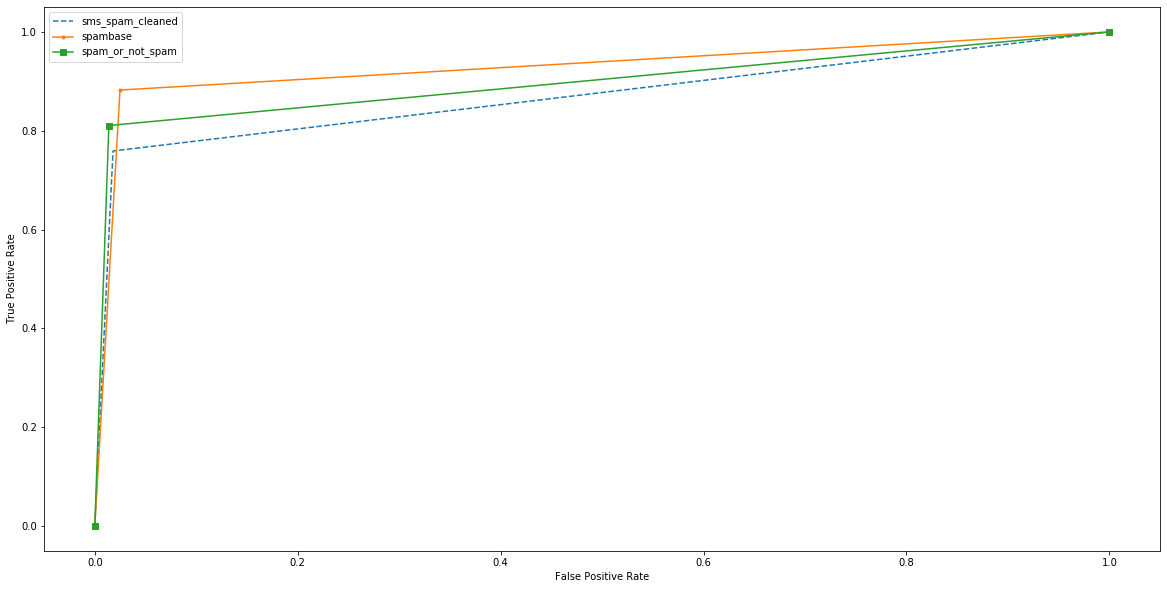

In [39]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

sms_sc_auc=roc_auc_score(y_sc_te, y_sc_pr)
sms_spambase_auc = roc_auc_score(y_spambase_te, y_spambase_pr)
spam_or_not_auc = roc_auc_score(y_spam_or_not_te, y_spam_or_not_pr)
print(f"ROC_AUC Score for: \n sms_spam_cleaned.csv = {sms_sc_auc}\n spambase.csv = {sms_spambase_auc}\n spam_or_not_spam.csv = {spam_or_not_auc}")

# calculate roc curves
sms_sc_fpr, sms_sc_tpr, _ = roc_curve(y_sc_te, y_sc_pr)
sms_spambase_fpr, sms_spambase_tpr, _ = roc_curve(y_spambase_te, y_spambase_pr)
spam_or_not_fpr, spam_or_not_tpr, _ = roc_curve(y_spam_or_not_te, y_spam_or_not_pr)
# plot the roc curve for the model
pyplot.figure(figsize=(20,10))
pyplot.plot(sms_sc_fpr, sms_sc_tpr, linestyle='--', label='sms_spam_cleaned')
pyplot.plot(sms_spambase_fpr, sms_spambase_tpr, marker='.', label='spambase') #spam_or_not_spam
pyplot.plot(spam_or_not_fpr, spam_or_not_tpr, marker='s', label='spam_or_not_spam')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()